In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18, 8
import numpy as np

In [3]:
data = pd.read_csv('SOBRADINHO_w_dates.csv', sep=';')

In [4]:
data[:5]

,ANO,JAN,FEV,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT,NOV,DEZ
0,1931,4676,4805,6630,7333,4467,2397,1870,1619,1448,1376,1935,2207
1,1932,4036,4531,3214,1976,1425,1292,1176,995,905,982,2107,3594
2,1933,5014,5516,3429,2692,1905,1357,1250,1072,915,1194,1799,3336
3,1934,6110,4222,2298,1615,1785,1167,997,897,799,877,905,1605
4,1935,4519,5442,5408,4716,3740,2010,1557,1237,1055,1079,1178,2585


In [5]:
df = {'DATE':[],'MEASURE':[]}
columns = data.keys()
for row in xrange(0,len(data)):
    for i,column in enumerate(columns):
        if i==0:
            pass
        else:
            df['DATE'].append(datetime(data[columns[0]][row],i,1))
            df['MEASURE'].append(data[column][row])

In [6]:
df = pd.DataFrame(data=df)
df[:5]

,DATE,MEASURE
0,1931-01-01,4676
1,1931-02-01,4805
2,1931-03-01,6630
3,1931-04-01,7333
4,1931-05-01,4467


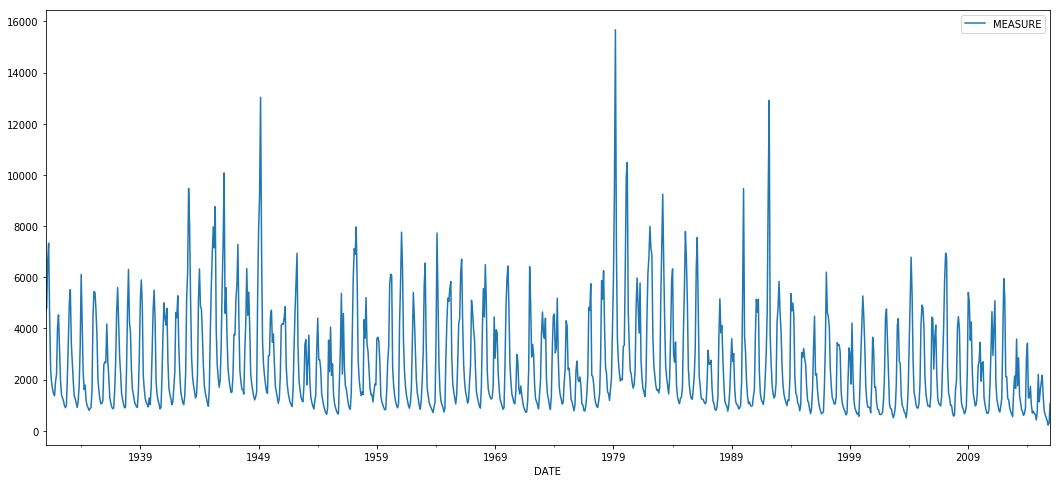

In [7]:
df.set_index('DATE').plot()
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries['MEASURE'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

/usr/local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  


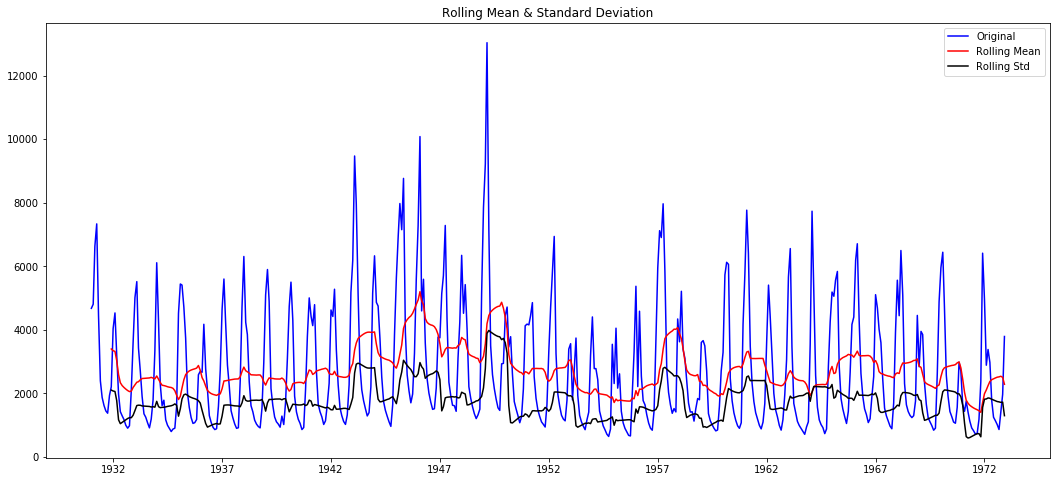

Results of Dickey-Fuller Test:
Test Statistic                  -3.912802
p-value                          0.001943
#Lags Used                      10.000000
Number of Observations Used    493.000000
Critical Value (5%)             -2.867420
Critical Value (1%)             -3.443684
Critical Value (10%)            -2.569902
dtype: float64


In [9]:
test_stationarity(df[:504].set_index('DATE'))

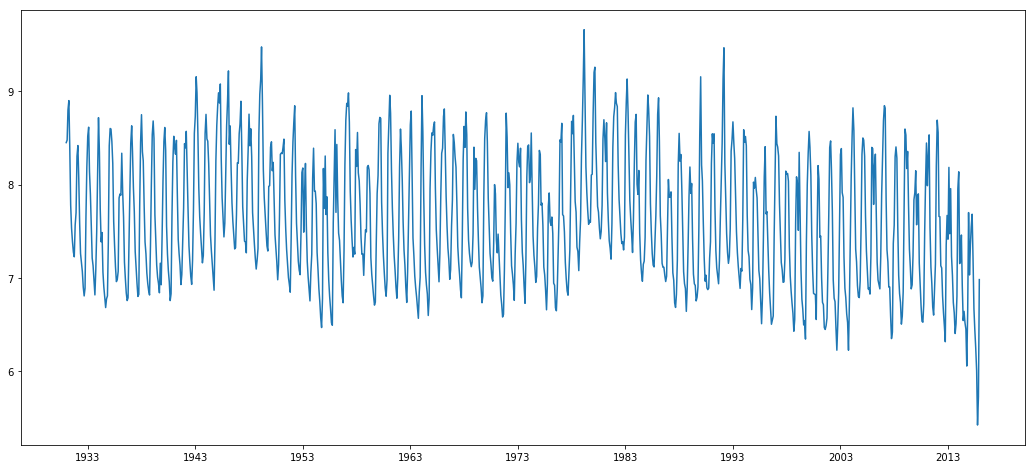

In [10]:
df_log = pd.DataFrame({'DATE':df['DATE'],'MEASURE':np.log(df['MEASURE'])}).set_index('DATE')
plt.plot(df_log)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


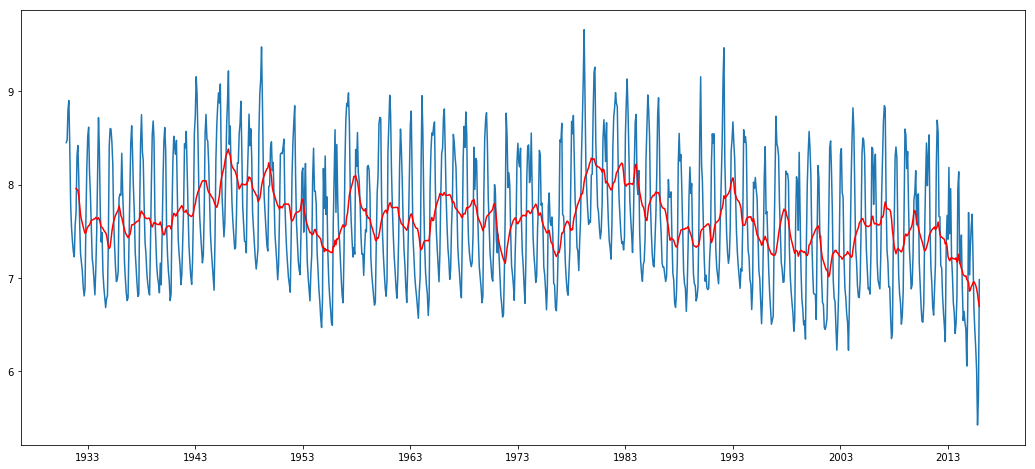

In [11]:
moving_avg = pd.rolling_mean(df_log,12)
plt.plot(df_log)
plt.plot(moving_avg, color='red')

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  


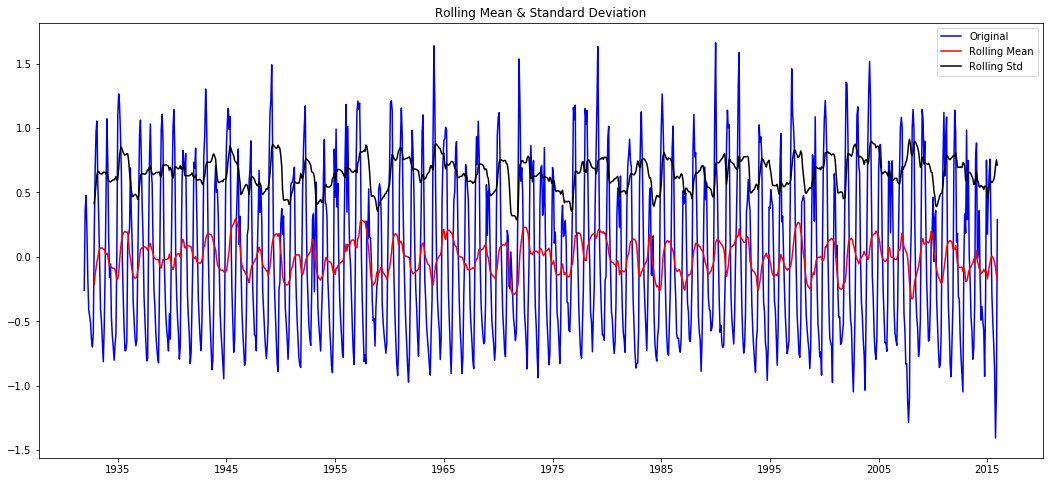

Results of Dickey-Fuller Test:
Test Statistic                -6.545473e+00
p-value                        9.122474e-09
#Lags Used                     2.200000e+01
Number of Observations Used    9.860000e+02
Critical Value (5%)           -2.864476e+00
Critical Value (1%)           -3.436999e+00
Critical Value (10%)          -2.568333e+00
dtype: float64


In [12]:
df_log_moving_avg_diff = df_log - moving_avg
df_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(df_log_moving_avg_diff)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
  """Entry point for launching an IPython kernel.


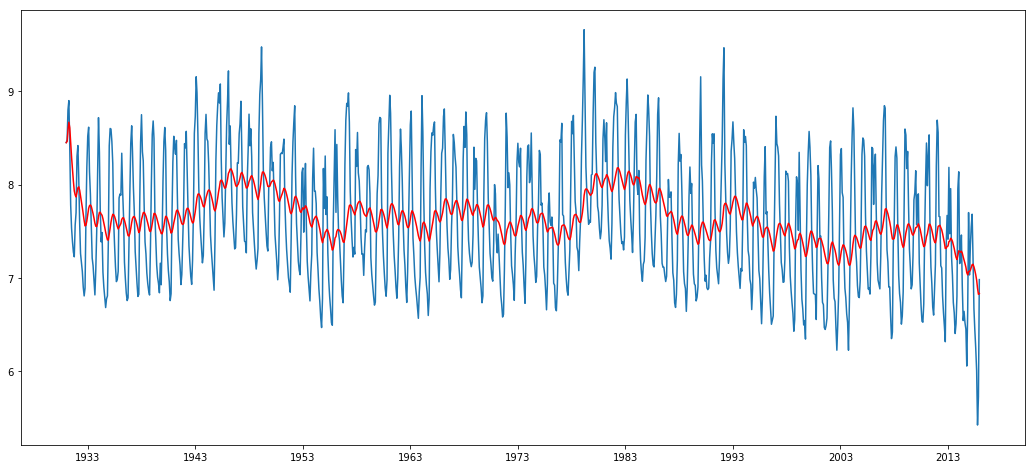

In [13]:
expwighted_avg = pd.ewma(df_log, halflife=12)
plt.plot(df_log)
plt.plot(expwighted_avg, color='red')

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  


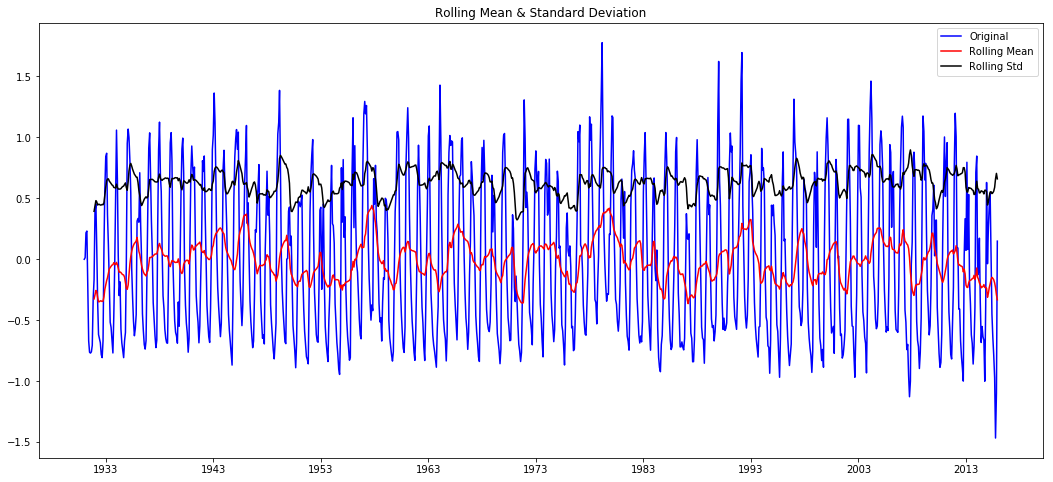

Results of Dickey-Fuller Test:
Test Statistic                  -4.733186
p-value                          0.000073
#Lags Used                      22.000000
Number of Observations Used    997.000000
Critical Value (5%)             -2.864443
Critical Value (1%)             -3.436926
Critical Value (10%)            -2.568316
dtype: float64


In [14]:
df_log_ewma_diff = df_log - expwighted_avg
test_stationarity(df_log_ewma_diff)

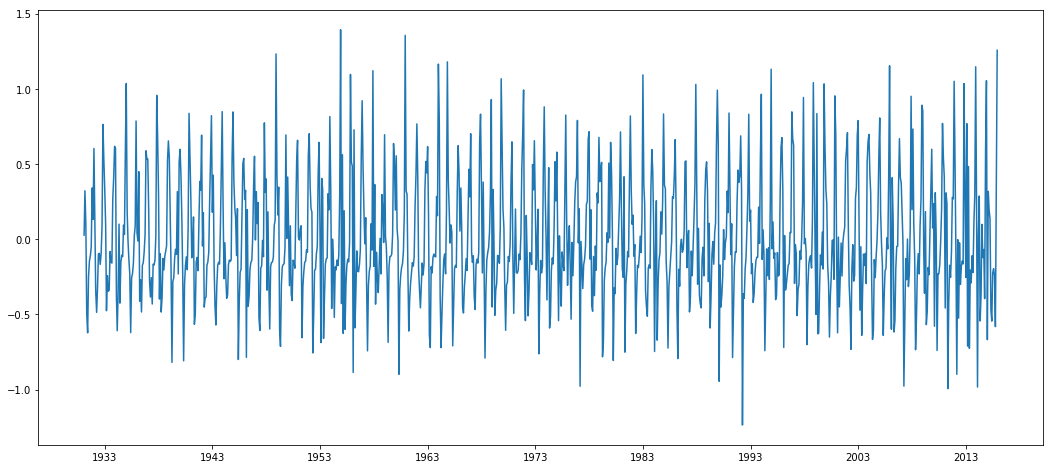

In [15]:
df_log_diff = df_log - df_log.shift()
plt.plot(df_log_diff)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  


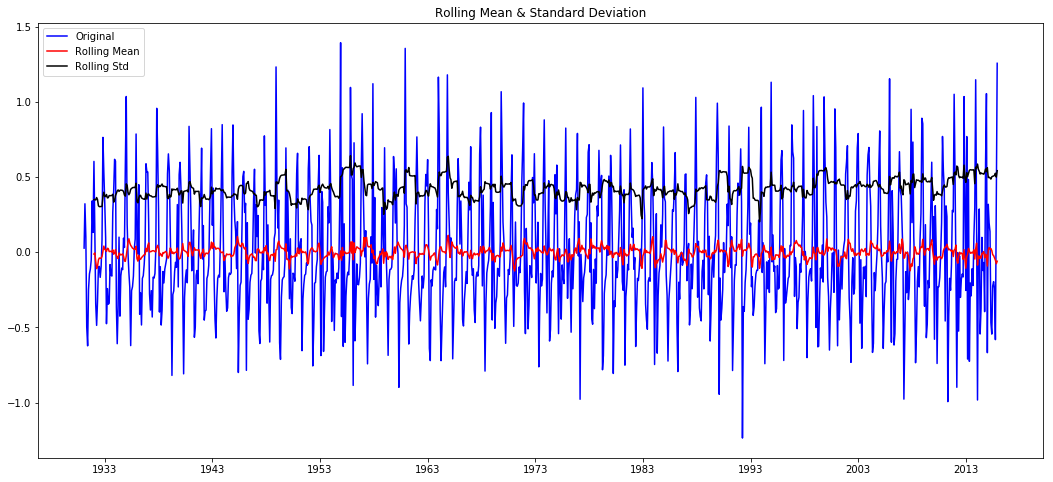

Results of Dickey-Fuller Test:
Test Statistic                -1.302943e+01
p-value                        2.361966e-24
#Lags Used                     2.100000e+01
Number of Observations Used    9.970000e+02
Critical Value (5%)           -2.864443e+00
Critical Value (1%)           -3.436926e+00
Critical Value (10%)          -2.568316e+00
dtype: float64


In [16]:
df_log_diff.dropna(inplace=True)
test_stationarity(df_log_diff)

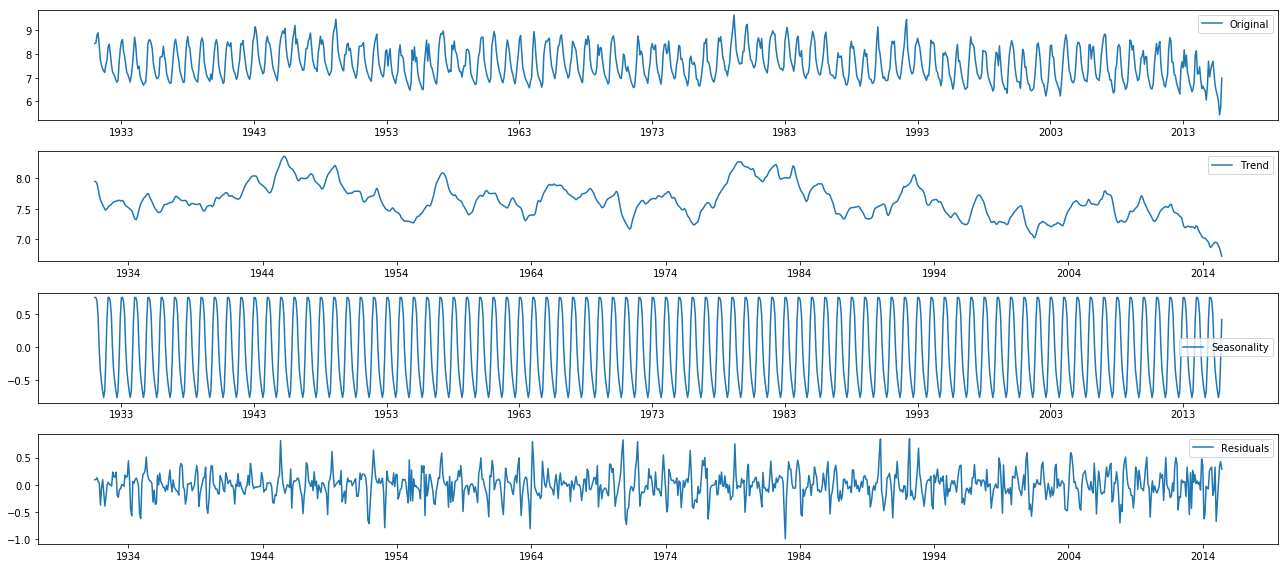

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  


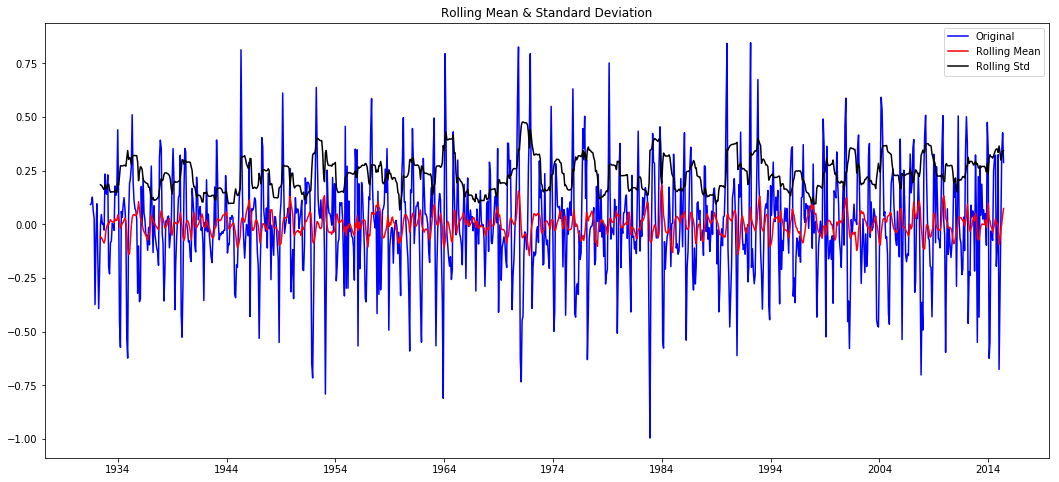

Results of Dickey-Fuller Test:
Test Statistic                -1.293627e+01
p-value                        3.612355e-24
#Lags Used                     2.100000e+01
Number of Observations Used    9.860000e+02
Critical Value (5%)           -2.864476e+00
Critical Value (1%)           -3.436999e+00
Critical Value (10%)          -2.568333e+00
dtype: float64


In [18]:
df_log_decompose = residual
df_log_decompose.dropna(inplace=True)
test_stationarity(df_log_decompose)

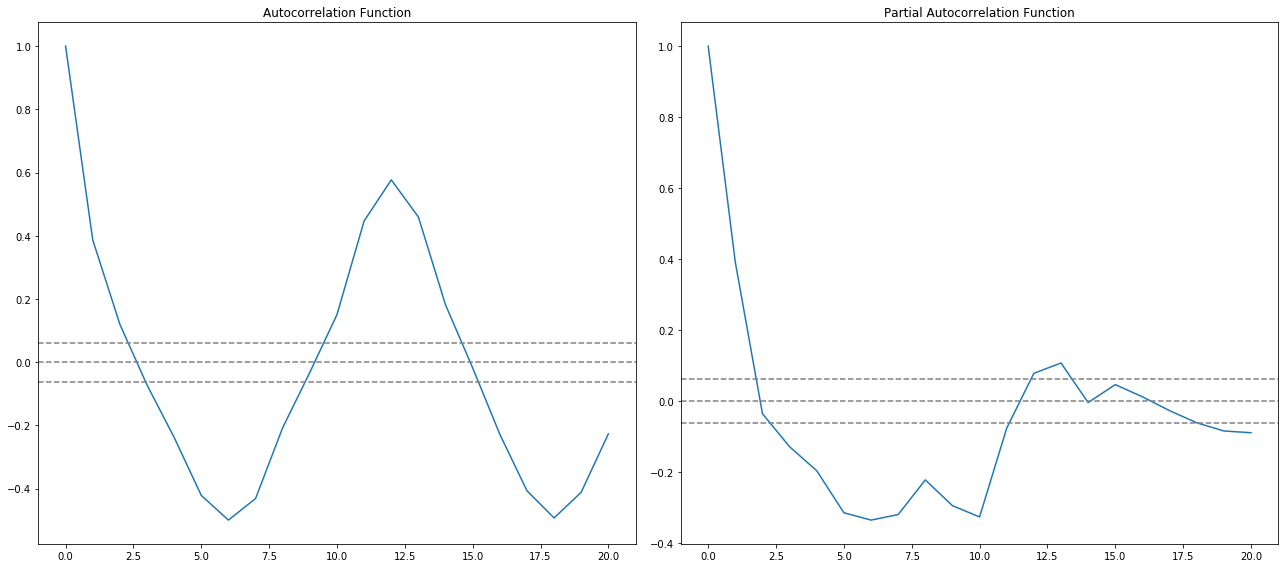

In [19]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df_log_diff, nlags=20)
lag_pacf = pacf(df_log_diff, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [20]:
df[:5]

,DATE,MEASURE
0,1931-01-01,4676
1,1931-02-01,4805
2,1931-03-01,6630
3,1931-04-01,7333
4,1931-05-01,4467


Using TensorFlow backend.


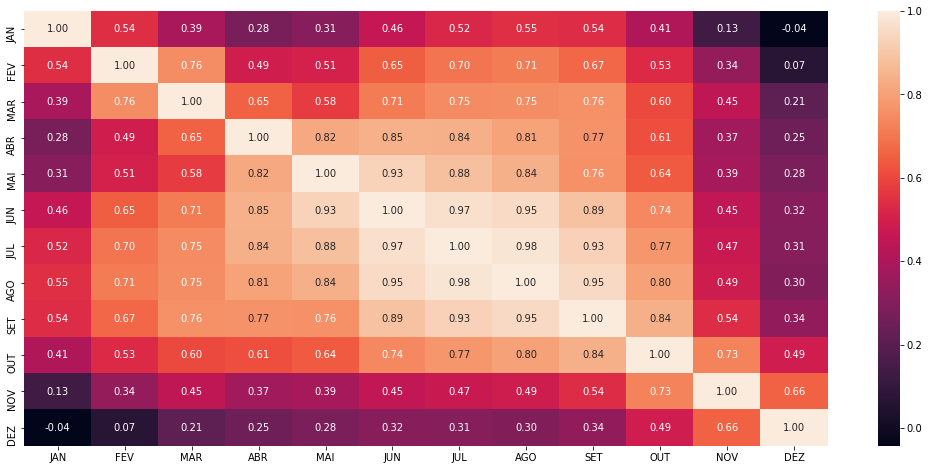

In [21]:
import keras 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from keras.optimizers import SGD
from keras.layers.advanced_activations import PReLU, LeakyReLU
from keras.callbacks import CSVLogger

#on_epoch_end: logs include acc and loss, and optionally include val_loss (if validation is enabled in fit), 
#              and  val_acc (if validation and accuracy monitoring are enabled).
#on_batch_begin: logs include size, the number of samples in the current batch.
#on_batch_end: logs include loss, and optionally acc (if accuracy monitoring is enabled).

class EPOHistory(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.epochs = []
    self.size_batch = []
    self.mae_epoch = []
    self.losses_epoch = []
    self.val_mae_epoch = []
    self.val_losses_epoch = []
    self.mae_batch = []
    self.losses_batch = []
    self.val_mae_batch = []
    self.val_losses_batch = [] 
  def on_epoch_end(self, epoch, logs={}):
    self.epochs.append(epoch)
    self.mae_epoch.append(logs.get('mean_absolute_error'))
    self.losses_epoch.append(logs.get('loss'))
    self.val_mae_epoch.append(logs.get('val_mean_absolute_error'))
    self.val_losses_epoch.append(logs.get('val_loss'))
  def on_batch_begin(self, batch, logs={}):
    self.size_batch.append(logs.get('mean_absolute_error'))
  def on_batch_end(self, batch, logs={}):
    self.mae_batch.append(logs.get('mean_absolute_error'))
    self.losses_batch.append(logs.get('loss'))
    self.val_mae_batch.append(logs.get('val_mean_absolute_error'))
    self.val_losses_batch.append(logs.get('val_loss'))
    
# Loading data
data = pd.read_csv('SOBRADINHO.csv')
# Correlation Heatmap
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

In [22]:
def fitModel(monthsSize = 3, forecastSize = 1, activationFunction='tanh', hiddenLayer=13, epochsModel=400, i=None):
  raw_data = []
  keys = data.keys()
  for row in xrange(0,len(data)):
      for key in keys:
          raw_data.append(data[key][row])
  data_mean = np.mean(raw_data)
  den = np.max(raw_data) - float(np.min(raw_data))
  for cell in xrange(0,len(raw_data)):
    raw_data[cell] = (raw_data[cell] - data_mean)/(den)
  arraySize = monthsSize+forecastSize
  batched_data = []                                   #array that will receive the data batched with lenght of the arraySize
  while len(raw_data) > arraySize:
      batched_data.append(raw_data[:arraySize])
      del raw_data[0]
  names = ['month-11','month-10','month-9',\
           'month-8','month-7','month-6',\
           'month-5','month-4','month-3',\
           'month-2','month-1','month_0','month+1']
  namesArray = names[-arraySize:]
  dict_data = {el:[] for el in namesArray}
  for row in xrange(0,len(batched_data)):
      for i,name in enumerate(namesArray):
          dict_data[name].append(batched_data[row][i])
  df = pd.DataFrame(dict_data)
  df = df.sample(frac=1).reset_index(drop=True)         #shuffle
  source_data = [[df[x][y] for x in namesArray if x!=namesArray[-1]] for y in xrange(0,len(df))]
  source_labels = [[df[namesArray[-1]][x]] for x in xrange(0,len(df))]
  funfundzwanzig = int(round(len(df)/4.0))
  validation_data = source_data[:funfundzwanzig]
  validation_labels = source_labels[:funfundzwanzig]  
  train_data = source_data[funfundzwanzig:-funfundzwanzig]
  train_labels = source_labels[funfundzwanzig:-funfundzwanzig]
  test_data = source_data[-funfundzwanzig:]
  test_labels = source_labels[-funfundzwanzig:]
  model = Sequential()
  if activationFunction=='LeakyReLU':
    model.add(LeakyReLU(alpha=0.3, input_shape=(monthsSize,))) 
  else:
    model.add(Dense(hiddenLayer, activation=activationFunction, input_shape=(monthsSize,))) 
  model.add(Dense(forecastSize, activation='linear'))
  sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
#   rmsprop
  model.compile(loss='mean_squared_error', 
                optimizer=sgd, 
                metrics=['mae'])
  epochsHistory = EPOHistory()
  history = model.fit(train_data, train_labels, 
                      batch_size=5, 
                      epochs=epochsModel, 
                      verbose=0, 
                      validation_data=( validation_data, validation_labels), 
                      callbacks=[epochsHistory])
  score = model.evaluate( test_data, test_labels, verbose=0)
  print('Test loss - %s:'%(arraySize), score[0]) 
  print('Test accuracy - %s:'%(arraySize), score[1])
  return score, model, history, epochsHistory

In [23]:
# Variables
monthsSize = 2
forecastSize = 1

months_Size = [1, 2, 3, 4, 6, 12]
forecast_Size = [1]
activation_Function=[PReLU(alpha_initializer='glorot_normal', alpha_regularizer=None, alpha_constraint=None, shared_axes=(0,1)), 'LeakyReLU','tanh','relu']
hidden_Layer=[12, 5, 4, 24, 16]
epochs_Model=[400]

# combinations = [[months_Size[a],forecast_Size[b],activation_Function[c],hidden_Layer[d],epochs_Model[e]] for a in xrange(0,len(months_Size)) for b in xrange(0,len(forecast_Size)) for c in xrange(0,len(activation_Function)) for d in xrange(0,len(hidden_Layer)) for e in xrange(0,len(epochs_Model))]
combinations = [[months_Size[a],forecast_Size[b],activation_Function[c],hidden_Layer[d],epochs_Model[e]]\
                for a in xrange(0,len(months_Size))\
                for b in xrange(0,len(forecast_Size))\
                for c in xrange(0,len(activation_Function))\
                for d in xrange(0,len(hidden_Layer))\
                for e in xrange(0,len(epochs_Model))]

In [ ]:
grid_search = []
for i,params in enumerate(combinations):
  grid_search.append(fitModel(*params,i=i))
  print "[INFO] Model %s trained of %s ==> %0.2f%%\n"%(i+1,len(combinations),(100.0*i/len(combinations)))

/usr/local/lib/python2.7/site-packages/keras/activations.py:103: UserWarning: Do not pass a layer instance (such as PReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


('Test loss - 2:', 0.0068521141640695872)
('Test accuracy - 2:', 0.062380489648557177)
[INFO] Model 1 trained of 120 ==> 0.00%

('Test loss - 2:', 0.0062907076970327132)
('Test accuracy - 2:', 0.05990067635681115)
[INFO] Model 2 trained of 120 ==> 0.83%

('Test loss - 2:', 0.0068009190827462021)
('Test accuracy - 2:', 0.061205779658813103)
[INFO] Model 3 trained of 120 ==> 1.67%

('Test loss - 2:', 0.0065081089260239228)
('Test accuracy - 2:', 0.06155215940054725)
[INFO] Model 4 trained of 120 ==> 2.50%

('Test loss - 2:', 0.0060949480800213769)
('Test accuracy - 2:', 0.058790380902150101)
[INFO] Model 5 trained of 120 ==> 3.33%



/usr/local/lib/python2.7/site-packages/keras/activations.py:103: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


('Test loss - 2:', 0.0067354459845113991)
('Test accuracy - 2:', 0.055576584093710954)
[INFO] Model 6 trained of 120 ==> 4.17%

('Test loss - 2:', 0.0068477943210917365)
('Test accuracy - 2:', 0.059373959139281625)
[INFO] Model 7 trained of 120 ==> 5.00%

('Test loss - 2:', 0.0057360324807757259)
('Test accuracy - 2:', 0.058357428335676004)
[INFO] Model 8 trained of 120 ==> 5.83%

('Test loss - 2:', 0.0057875291334793851)
('Test accuracy - 2:', 0.057404541998517279)
[INFO] Model 9 trained of 120 ==> 6.67%

('Test loss - 2:', 0.0062780299552661527)
('Test accuracy - 2:', 0.059868755454526225)
[INFO] Model 10 trained of 120 ==> 7.50%

('Test loss - 2:', 0.0051162707290666942)
('Test accuracy - 2:', 0.056346413288630694)
[INFO] Model 11 trained of 120 ==> 8.33%

('Test loss - 2:', 0.0068010098118261968)
('Test accuracy - 2:', 0.063580017054782195)
[INFO] Model 12 trained of 120 ==> 9.17%

('Test loss - 2:', 0.0058366135602780419)
('Test accuracy - 2:', 0.054479392866293587)
[INFO] Model 1

In [ ]:
# g = sns.lmplot(x="epoch",
#                y="val_loss",
#                data=results)
# g.figure()
# g = sns.lmplot(x="epoch",
#                y="loss",
#                data=results)
grid_list = sorted(grid_search, key=lambda x: x[0][1])
bestEpochsHistory = pd.DataFrame({'epochs':grid_list[0][3].epochs,
                            'mae_epoch':grid_list[0][3].mae_epoch,
                            'losses_epoch':grid_list[0][3].losses_epoch,
                            'val_mae_epoch':grid_list[0][3].val_mae_epoch,
                            'val_losses_epoch':grid_list[0][3].val_losses_epoch})
# bestBatchHistory = pd.DataFrame({'size_batch':grid_list[0][3].size_batch,
#                                  'mae_batch':grid_list[0][3].mae_batch,
#                                  'losses_batch':grid_list[0][3].losses_batch,
#                                  'val_mae_batch':grid_list[0][3].val_mae_batch,
#                                  'val_losses_batch':grid_list[0][3].val_losses_batch})
fig, ax = plt.subplots()
g = sns.pointplot(x='epochs', y='losses_epoch', data=bestEpochsHistory, ax=ax, color='b')
g = sns.pointplot(x='epochs', y='val_losses_epoch', data=bestEpochsHistory, ax=ax, color='r')

In [ ]:
fig, ax = plt.subplots()
h = sns.pointplot(x='epochs', y='mae_epoch', data=bestEpochsHistory, ax=ax, color='b')
h = sns.pointplot(x='epochs', y='val_mae_epoch', data=bestEpochsHistory, ax=ax, color='r')